# Bike Sharing Case study

### Problem Statement

A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Expectation from case study

- Load and understand the model, Perform EDA to keep required columns 
- Create Linear Regression Model and derive dependent variables 
- Using the model predict the demand dynamics of new market

# Step 1: Loading and understanding the data

In [1]:
import pandas as pd
import numpy as np
bk_share = pd.read_csv("day.csv")
bk_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
#Check for number of Rows and Columns
bk_share.shape

(730, 16)

In [3]:
#Check for data type and missing values
bk_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


    There is no missing values in the data

# Step 2: Visualization, Cleaning and mapping of data

### Below columns are dropped from analysis

   1.**instant** : Contains indexing of data can be dropped from model building   
   2.**dteday** : This data can be derived from month,year,workingday and weekend   
   3.**casual and registered** : Since cnt = casual+registered we can drop related columns

In [4]:
bk_share.drop(columns=["instant","dteday","casual","registered"],inplace=True)

In [5]:
bk_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### As per data dictonary mapping numric values with string values for non-boolean categorical variables

In [6]:
def mappingFuction(cell,mappingList,starting_index):
    mappingDict = {}
    index = starting_index
    for listItem in mappingList:
        mappingDict[index] = listItem
        index = index+1
    return bk_share[cell].map(mappingDict)

In [7]:
bk_share.season = mappingFuction("season",["Spring","Summer","Fall","Winter"],1)
bk_share.weathersit = mappingFuction("weathersit",["Clear","Mist","Light Snow","Snow + Fog"],1)
bk_share.mnth = mappingFuction("mnth",["Jan","Feb","Mar","April","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],1)
bk_share.weekday = mappingFuction("weekday",["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],0)

In [8]:
bk_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

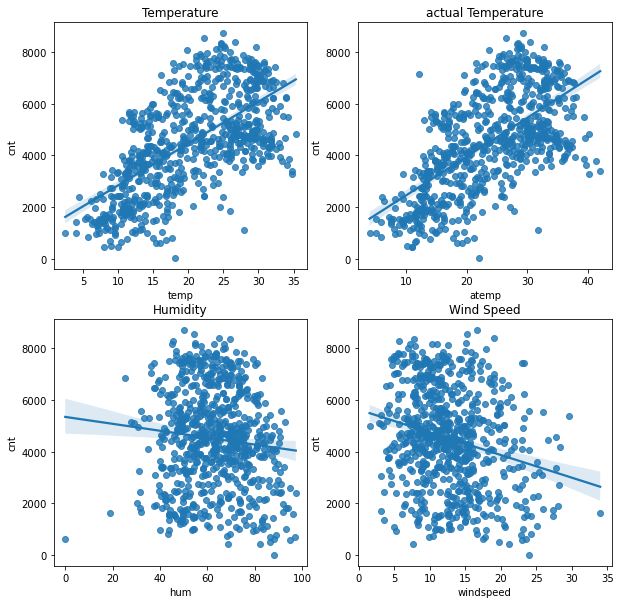

In [10]:
#Plot scatterd plot for continous variable
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Temperature")
sns.regplot(x=bk_share.temp,y=bk_share.cnt)
plt.subplot(2,2,2)
plt.title("actual Temperature")
sns.regplot(x=bk_share.atemp,y=bk_share.cnt)
plt.subplot(2,2,3)
plt.title("Humidity")
sns.regplot(x=bk_share.hum,y=bk_share.cnt)
plt.subplot(2,2,4)
plt.title("Wind Speed")
sns.regplot(x=bk_share.windspeed,y=bk_share.cnt)
plt.show()

<AxesSubplot:title={'center':'Weathersit'}, xlabel='weathersit', ylabel='cnt'>

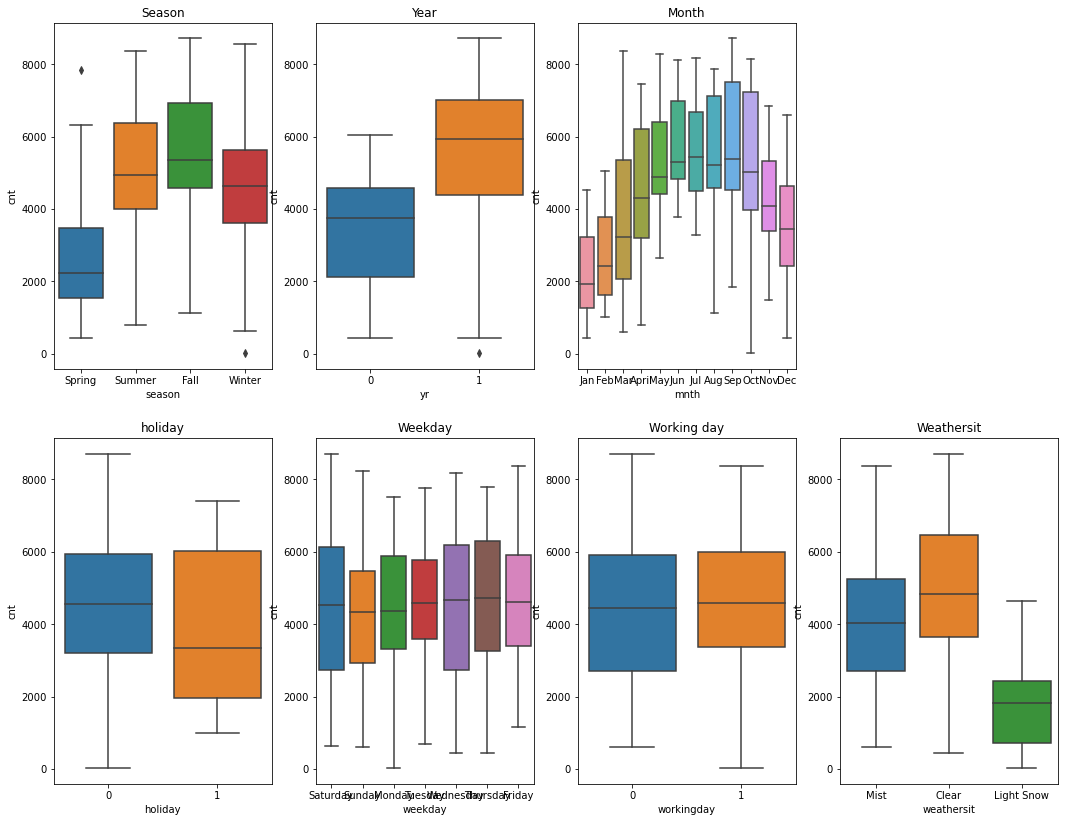

In [11]:
#Plot scatterd plot for Categorical variable
plt.figure(figsize=(18,14))
plt.subplot(2,4,1)
plt.title("Season")
sns.boxplot(x=bk_share.season,y=bk_share.cnt)
plt.subplot(2,4,2)
plt.title("Year")
sns.boxplot(x=bk_share.yr,y=bk_share.cnt)
plt.subplot(2,4,3)
plt.title("Month")
sns.boxplot(x=bk_share.mnth,y=bk_share.cnt)
plt.subplot(2,4,5)
plt.title("holiday")
sns.boxplot(x=bk_share.holiday,y=bk_share.cnt)
plt.subplot(2,4,6)
plt.title("Weekday")
sns.boxplot(x=bk_share.weekday,y=bk_share.cnt)
plt.subplot(2,4,7)
plt.title("Working day")
sns.boxplot(x=bk_share.workingday,y=bk_share.cnt)
plt.subplot(2,4,8)
plt.title("Weathersit")
sns.boxplot(x=bk_share.weathersit,y=bk_share.cnt)

## Observations from the graphs

<AxesSubplot:>

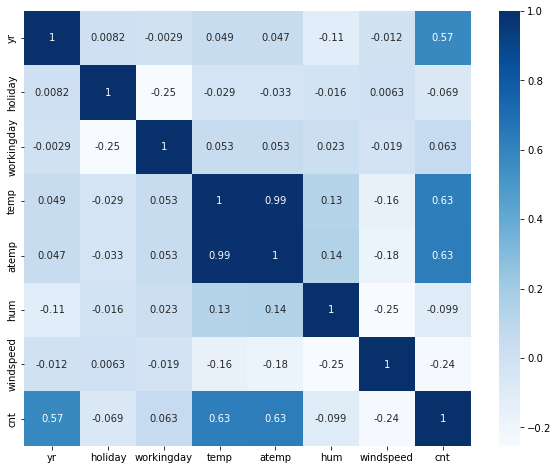

In [12]:
#Plot the heatmap to get the correlation among the continuous variables
plt.figure(figsize=(10,8))
sns.heatmap(bk_share.corr(),annot=True,cmap="Blues")

### From above co-relation we can conclude temp is highly co-related with atemp hence we are dropping temp and keeping atemp

In [13]:
#drop temp
bk_share = bk_share.drop("temp",axis=1)

In [14]:
bk_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


# Step 3: Data Preparation

### Create dummy variables from non binary categorical variables

In [15]:
season_dummy = pd.get_dummies(bk_share.season,drop_first=True)
season_dummy.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
month_dummy = pd.get_dummies(bk_share.mnth,drop_first=True)
month_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [17]:
weekday_dummy = pd.get_dummies(bk_share.weekday,drop_first=True)
weekday_dummy.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [18]:
weathersit_dummy = pd.get_dummies(bk_share.weathersit,drop_first=True)
weathersit_dummy.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [19]:
#Concatinating all dummy columns created with orginal data
bk_share = pd.concat([bk_share,season_dummy,month_dummy,weekday_dummy,weathersit_dummy],axis=1)
bk_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,Spring,0,Jan,0,Saturday,0,Mist,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sunday,0,Mist,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#Delete the original columns after creating dummy columns for each
bk_share.drop("season",axis=1,inplace=True)
bk_share.drop("mnth",axis=1,inplace=True)
bk_share.drop("weekday",axis=1,inplace=True)
bk_share.drop("weathersit",axis=1,inplace=True)
bk_share.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Train and Test split of the data

In [21]:
#Import train and test split
import sklearn
from sklearn.model_selection import train_test_split

In [22]:
bk_share_train,bk_share_test = train_test_split(bk_share,train_size=0.7,random_state=True)
print(bk_share_train.shape)
print(bk_share_test.shape)

(510, 29)
(220, 29)


## Perform scaling on continuous variables

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
num_var = ["atemp","hum","windspeed","cnt"]
bk_share_train[num_var] = scaler.fit_transform(bk_share_train[num_var])
bk_share_train[num_var].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.557248,0.526474,0.400317,0.525079
std,0.219147,0.194258,0.190021,0.218870
min,0.000000,0.000000,0.000000,0.000000
25%,0.381278,0.379602,0.264072,0.382737
50%,0.585630,0.524942,0.371641,0.527266
75%,0.733434,0.668793,0.512950,0.680022
max,1.000000,1.000000,1.000000,1.000000


# Step 4 : Training the model

In [25]:
#Derive X_train and y_train from training data
y_train = bk_share_train.pop("cnt")
X_train = bk_share_train
print(X_train.head())
print(y_train.head())

     yr  holiday  workingday     atemp       hum  windspeed  Spring  Summer  \
135   0        0           1  0.650070  0.743040   0.249252       0       1   
626   1        0           1  0.636133  0.393272   0.459915       0       0   
554   1        0           1  0.792844  0.597447   0.378326       0       0   
311   0        0           1  0.459416  0.650812   0.111281       0       0   
312   0        0           1  0.455049  0.701856   0.094959       0       0   

     Winter  Aug  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  Tuesday  \
135       0    0  ...    0    0       1         0       0         0        0   
626       0    0  ...    0    1       0         0       0         0        0   
554       0    0  ...    0    0       1         0       0         0        0   
311       1    0  ...    0    0       0         0       0         0        1   
312       1    0  ...    0    0       0         0       0         0        0   

     Wednesday  Light Snow  Mist  
135      

### For building initial model we use RFE approach and choose first 15 features

In [26]:
#import RFE and LinearRegression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
#Choose top 15 features using RFE
rfe = RFE(lm,n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 4),
 ('Jul', False, 12),
 ('Jun', False, 8),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', False, 7),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', False, 9),
 ('Thursday', False, 14),
 ('Tuesday', False, 11),
 ('Wednesday', False, 13),
 ('Light Snow', True, 1),
 ('Mist', False, 2)]

In [30]:
#List of columns which are not considered from RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Nov', 'Monday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Mist'],
      dtype='object')

In [31]:
#Will consider only the columns that are returned as True from RFE
req_col = X_train.columns[rfe.support_]
X_train_rfe = X_train[req_col]
X_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Mar,May,Oct,Sep,Saturday,Light Snow
135,0,1,0.650070,0.743040,0.249252,0,1,0,0,0,1,0,0,0,0
626,1,1,0.636133,0.393272,0.459915,0,0,0,0,0,0,0,1,0,0
554,1,1,0.792844,0.597447,0.378326,0,0,0,0,0,0,0,0,0,0
311,0,1,0.459416,0.650812,0.111281,0,0,1,0,0,0,0,0,0,0
312,0,1,0.455049,0.701856,0.094959,0,0,1,0,0,0,0,0,0,0


### Model building

In [32]:
import statsmodels.api as sm
#Add constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

In [33]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          2.02e-179
Time:                        22:38:22   Log-Likelihood:                 504.51
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     494   BIC:                            -909.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2552      0.034      7.506      0.0

### Observations : From the model we have below points
    1. Good R-Square value
    2. Good F-statistic
    3. But lot many variables having higher p-value hence calculate the VIF for all of them

In [34]:
#Calculate VIF - Variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.32
2,atemp,10.22
4,windspeed,5.54
1,workingday,4.39
6,Summer,3.39
5,Spring,3.20
7,Winter,3.12
0,yr,2.03
10,May,1.63
13,Saturday,1.61


### Drop the column the with high VIF - hum


In [35]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

## Model 2

In [36]:
#Add constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train,X_train_sm)
lr2_model = lr2.fit()
print(lr2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     145.2
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          5.09e-165
Time:                        22:38:22   Log-Likelihood:                 467.47
No. Observations:                 510   AIC:                            -904.9
Df Residuals:                     495   BIC:                            -841.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1573      0.035      4.557      0.0

In [37]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.43
3,windspeed,5.42
1,workingday,4.36
5,Summer,3.09
4,Spring,2.38
6,Winter,2.31
0,yr,2.02
9,May,1.62
12,Saturday,1.60
7,Aug,1.54


### Drop the column the with high P-value - May


In [38]:
X_train_rfe=X_train_rfe.drop(['May'],axis=1)

## Model 3

In [39]:
#Add constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train,X_train_sm)
lr3_model = lr3.fit()
print(lr3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     156.3
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          6.70e-166
Time:                        22:38:23   Log-Likelihood:                 466.94
No. Observations:                 510   AIC:                            -905.9
Df Residuals:                     496   BIC:                            -846.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1526      0.034      4.461      0.0

In [40]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.35
3,windspeed,5.34
1,workingday,4.36
5,Summer,2.45
4,Spring,2.36
6,Winter,2.31
0,yr,2.02
11,Saturday,1.60
7,Aug,1.54
9,Oct,1.53


### Drop the column the with high P-value - Aug

In [41]:
X_train_rfe=X_train_rfe.drop(['Aug'],axis=1)

## Model 4

In [42]:
#Add constant to X_train
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train,X_train_sm)
lr4_model = lr4.fit()
print(lr4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.04e-166
Time:                        22:38:23   Log-Likelihood:                 466.19
No. Observations:                 510   AIC:                            -906.4
Df Residuals:                     497   BIC:                            -851.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.033      4.871      0.0

In [43]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.68
3,windspeed,5.25
1,workingday,4.33
4,Spring,2.19
6,Winter,2.14
0,yr,2.02
5,Summer,2.02
10,Saturday,1.59
8,Oct,1.52
9,Sep,1.24


### Observation - Since VIF of atemp is slightly above 5 for needed parameters and its needed parameter as per P value we are going with this model


### Model Validation

In [44]:
#Predict values
y_train_pred = lr4_model.predict(X_train_sm)

In [45]:
#Calculate residuals 
res = y_train - y_train_pred

C:\Users\i320807\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

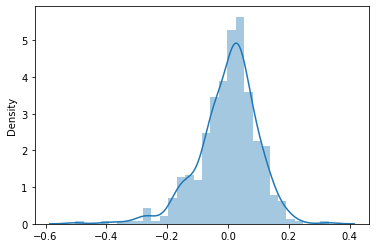

In [46]:
sns.distplot(res)

### Observations : Error terms are normally distributed and hence linear regression assumption is true

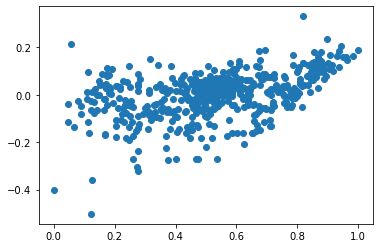

In [47]:
#Scatter plot for y-train and residuals
plt.scatter(y_train,res)
plt.show()

# Step 5 - Model Prediction

In [48]:
## Rescalling of variable
bk_share_test[num_var] = scaler.transform(bk_share_test[num_var])
bk_share_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
248,0,0,1,0.601379,0.880915,0.767112,0.309250,0,0,0,...,0,1,0,0,0,0,1,0,1,0
298,0,0,1,0.542977,0.649072,0.301190,0.445467,0,0,1,...,1,0,0,0,0,0,0,1,0,1
159,0,0,1,0.935594,0.437354,0.304151,0.447883,0,1,0,...,0,0,0,0,0,1,0,0,0,1
660,1,0,1,0.622206,0.539443,0.172135,0.856420,0,0,1,...,1,0,0,0,0,0,1,0,0,0
511,1,0,0,0.775430,0.616589,0.459906,0.755752,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
#X_test and y_test division#
y_test = bk_share_test.pop('cnt')
X_test = bk_share_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 248 to 589
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   atemp       220 non-null    float64
 4   hum         220 non-null    float64
 5   windspeed   220 non-null    float64
 6   Spring      220 non-null    uint8  
 7   Summer      220 non-null    uint8  
 8   Winter      220 non-null    uint8  
 9   Aug         220 non-null    uint8  
 10  Dec         220 non-null    uint8  
 11  Feb         220 non-null    uint8  
 12  Jan         220 non-null    uint8  
 13  Jul         220 non-null    uint8  
 14  Jun         220 non-null    uint8  
 15  Mar         220 non-null    uint8  
 16  May         220 non-null    uint8  
 17  Nov         220 non-null    uint8  
 18  Oct         220 non-null    uint8  
 19  Sep         220 non-null   

In [51]:
X_train_new=X_train_sm.drop(['const'], axis=1)
X_test_new=X_test[X_train_new.columns]
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 248 to 589
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   atemp       220 non-null    float64
 4   windspeed   220 non-null    float64
 5   Spring      220 non-null    uint8  
 6   Summer      220 non-null    uint8  
 7   Winter      220 non-null    uint8  
 8   Mar         220 non-null    uint8  
 9   Oct         220 non-null    uint8  
 10  Sep         220 non-null    uint8  
 11  Saturday    220 non-null    uint8  
 12  Light Snow  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 12.0 KB


In [52]:
X_test_new.shape

(220, 13)

In [53]:
#Prediction for test set
y_test_pred = lr4_model.predict(X_test_new)

In [54]:
res = y_test - y_test_pred

C:\Users\i320807\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

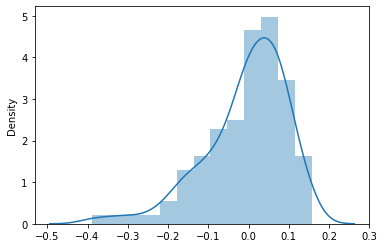

In [55]:
sns.distplot(res)

In [56]:
from sklearn.metrics import r2_score
#R-square value of test
r2 = r2_score(y_test,y_test_pred)
r2

0.7994101484720373

In [57]:
#Adjusted r-Square
adjusted_r2 = 1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
adjusted_r2

0.770004306363226

## Below are the validations of r2 and adjusted r2 values of Train and Test set


**r2 value** : 0.80 (train) and 0.79 (test)

**Adj r2**   : 0.80 (train) and 0.77 (test)

#### Printing the final Model summary again

In [58]:
print(lr4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.04e-166
Time:                        22:40:18   Log-Likelihood:                 466.19
No. Observations:                 510   AIC:                            -906.4
Df Residuals:                     497   BIC:                            -851.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.033      4.871      0.0

### From above result we can derive equation for model as below

**cnt=0.2405\*yr + 0.0402\*workingday + 0.4394\*atemp - 0.1067\*windspeed - 0.1020\*Spring + 0.0335\*Summer +  0.0365\*Winter + 0.0514\*Mar + 0.0553\*Oct + 0.0833\*Sep + 0.0765\*Saturday - 0.2646\*Light Snow**

### Conclusion

Top variables contributing count of shared bikes

1.atemp - Positive co-relation

2.yr - Positive co-relation

3.Light snow - Negative co-relation